# 추가분석-기초정보군집화&대출상품간연관성
- 사용 데이터: log_data_cleansed_v2.csv, join_done.csv -> basic_spec.csv

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time as tm
sns.set(font="NanumBarunGothic", 
rc={"axes.unicode_minus":False}, style='white')
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install KModes

In [ ]:
# 추가 import library
from kmodes.kmodes import KModes
from sklearn.metrics.pairwise import cosine_similarity

## 1. 데이터 불러오기 - ['gender','age_group','purpose']

In [ ]:
log_data_cleansed=pd.read_csv("log_data_cleansed_v2 (1).csv")

In [ ]:
loan_user_join=pd.read_csv("join_done.csv")
basic_spec=loan_user_join[['gender','age_group','purpose']]

In [ ]:
loan_user_join.columns

Index(['item_id', 'application_id', 'loanapply_insert_time', 'bank_id',
       'product_id', 'loan_limit', 'loan_rate', 'user_id', 'gender',
       'credit_score', 'yearly_income', 'desired_amount', 'existing_loan_cnt',
       'existing_loan_amt', 'age', 'avg_loan_limit', 'avg_loan_rate',
       'insert_time', 'insert_day', 'age_group', 'income_type',
       'employment_type', 'houseown_type', 'purpose',
       'personal_rehabilitation', 'insert_month', 'insert_weekend',
       'expected_loan_amt', 'total_expected_loan', 'expected_redeem',
       'is_applied', 'bank_score', 'ID'],
      dtype='object')

In [ ]:
basic_spec=loan_user_join[['gender','age_group','purpose']]

In [ ]:
basic_spec

,gender,age_group,purpose
0,1.0,30.0,대환대출
1,1.0,30.0,대환대출
2,1.0,30.0,대환대출
3,1.0,30.0,대환대출
4,1.0,30.0,대환대출
...,...,...,...
13514885,0.0,40.0,생활비
13514886,0.0,40.0,생활비
13514887,0.0,40.0,생활비
13514888,0.0,40.0,생활비


## -user 기준 데이터 생성

- gender

In [ ]:
basic_spec_1=pd.DataFrame(loan_user_join.groupby(['user_id']).apply(lambda x: x['gender'].value_counts().index[0]))

- age_group

In [ ]:
basic_spec_2=pd.DataFrame(loan_user_join.groupby(['user_id']).apply(lambda x: x['age_group'].value_counts().index[0]))

- purpose

In [ ]:
basic_spec_3=pd.DataFrame(loan_user_join.groupby(['user_id']).apply(lambda x: x['purpose'].value_counts().index[0]))

## -데이터 병합

In [ ]:
total=basic_spec_1.merge(basic_spec_2,on='user_id',how='inner')
total=total.merge(basic_spec_3,on='user_id',how='inner')
total.to_csv("/content/drive/MyDrive/빅콘테스트/basic_spec.csv")

(317328, 2)


In [ ]:
print(basic_spec_1.shape)
print(basic_spec_2.shape)
print(basic_spec_3.shape)
print(total.shape)

(317328, 3)


In [ ]:
total=pd.read_csv("basic_spec.csv")
total=total.rename({'0_x':'gender','0_y':'age_group','0':'purpose'},axis=1)
total=total.drop(['user_id'],axis=1)

In [ ]:
total['gender'].value_counts()

1.0    211725
0.0    105603
Name: gender, dtype: int64

In [ ]:
total['age_group'].value_counts()

30.0    103510
40.0     95446
20.0     51595
50.0     49015
60.0     15095
70.0      2319
80.0       339
90.0         9
Name: age_group, dtype: int64

In [ ]:
basic_spec['age_group'].value_counts()

1    103510
2     95446
0     51595
3     49015
4     15095
5      2319
6       339
7         9
Name: age_group, dtype: int64

In [ ]:
total['purpose'].value_counts()

생활비       177647
대환대출       85094
사업자금       19836
전월세보증금     11367
주택구입        9677
기타          8229
투자          4299
자동차구입       1179
Name: purpose, dtype: int64

In [ ]:
basic_spec['purpose'].value_counts()

3    177647
1     85094
2     19836
5     11367
6      9677
0      8229
7      4299
4      1179
Name: purpose, dtype: int64

# 2. 라벨 인코딩

In [ ]:
from sklearn import preprocessing
total=total.drop(['user_id'],axis=1)
le = preprocessing.LabelEncoder()
basic_spec = total.apply(le.fit_transform)
basic_spec

,gender,age_group,purpose
0,1,0,2
1,1,0,1
2,0,3,1
3,1,1,3
4,0,1,3
...,...,...,...
317323,1,1,3
317324,0,0,3
317325,1,0,1
317326,1,0,3


In [ ]:
basic_spec.describe()

,gender,age_group,purpose
count,317328.000000,317328.000000,317328.000000
mean,0.667212,1.624562,2.544411
std,0.471212,1.124243,1.341340
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000
50%,1.000000,2.000000,3.000000
75%,1.000000,2.000000,3.000000
max,1.000000,7.000000,7.000000


# 3. K-modes
- init=Cao 설정

### -적절한 군집 개수 찾기

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 416524.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 363110.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 296672.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 262854.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 562, cost: 258948.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 298, cost: 258133.0


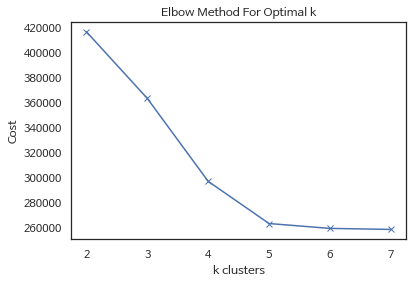

In [ ]:
cost = []
K = range(2,8)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(basic_spec)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

## -n_clusters=5 지정

In [ ]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(basic_spec)
basic_spec['Cao']=fitClusters_cao

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 262854.0


In [ ]:
basic_spec

,gender,age_group,purpose,Cao
0,1,0,2,2
1,1,0,1,2
2,0,3,1,1
3,1,1,3,0
4,0,1,3,0
...,...,...,...,...
317323,1,1,3,0
317324,0,0,3,3
317325,1,0,1,2
317326,1,0,3,0


## -군집분석

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf=clusterCentroidsDf.rename({0:'gender',1:'age_group',2:'purpose'},axis=1)
clusterCentroidsDf

,gender,age_group,purpose
0,1,1,3
1,0,2,1
2,1,0,1
3,0,0,3
4,1,2,2


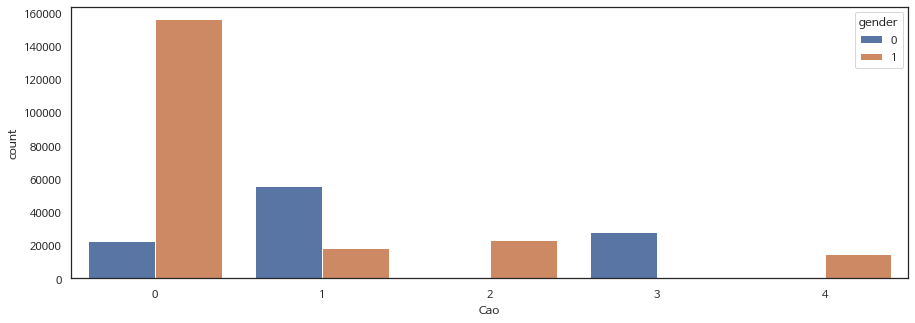

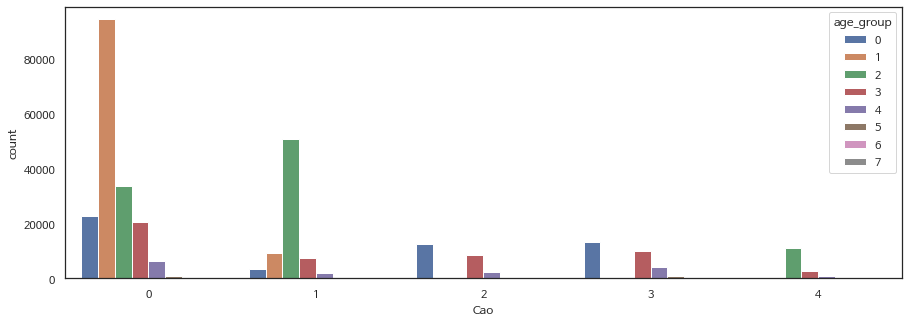

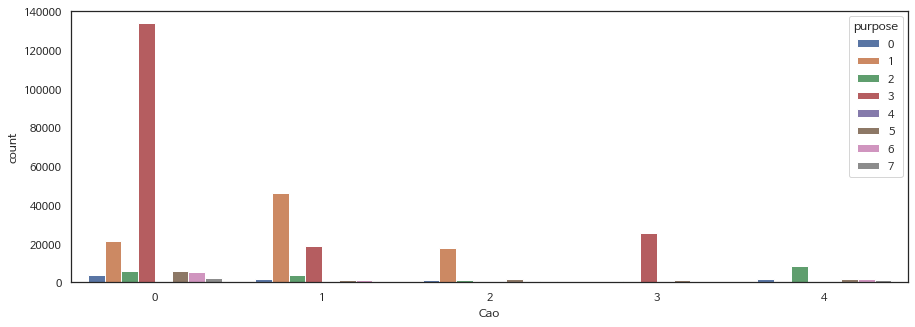

In [ ]:
all_features=['gender','age_group','purpose']
for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cao',hue=col, data = basic_spec)
    plt.show()

# 대출상품간의 연관성

In [ ]:
print("<bank_id>")
print(sorted(loan_user_join['bank_id'].unique()))
print("==================================================================================================================================")
print("product_id")
print(sorted(loan_user_join['product_id'].unique()))

<bank_id>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
product_id
[1, 5, 7, 8, 12, 15, 16, 19, 20, 22, 24, 25, 26, 29, 30, 31, 35, 36, 38, 39, 40, 42, 43, 46, 47, 48, 49, 51, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 67, 68, 70, 71, 75, 78, 79, 80, 81, 82, 85, 86, 90, 91, 92, 93, 94, 96, 98, 100, 101, 103, 105, 107, 108, 110, 111, 113, 114, 118, 119, 121, 123, 124, 126, 127, 128, 129, 131, 134, 136, 137, 138, 139, 140, 141, 142, 144, 146, 147, 148, 149, 150, 152, 157, 159, 161, 162, 163, 164, 166, 168, 169, 170, 171, 174, 175, 176, 178, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 200, 204, 205, 206, 211, 215, 216, 217, 220, 221, 222, 223, 224, 225, 226, 227, 229, 231, 233, 234, 235, 236, 238, 239, 240, 241, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 

In [ ]:
loan_user_join['bankproduct']=loan_user_join['bank_id'].astype(str)+loan_user_join['product_id'].astype(str)
loan_user_join['rate']=1

In [ ]:
loan_user_join[['user_id','bank_id','product_id','bankproduct']]

,user_id,bank_id,product_id,bankproduct
0,777860.0,59,150,59150
1,777860.0,38,223,38223
2,777860.0,50,142,50142
3,777860.0,37,206,37206
4,777860.0,38,16,3816
...,...,...,...,...
13514885,640786.0,38,223,38223
13514886,640786.0,30,85,3085
13514887,640786.0,35,168,35168
13514888,640786.0,22,221,22221


In [ ]:
apply_matrix

bankproduct              10149  1065   11  11118  11170  12137  1235  1268  \
user_id  application_id                                                      
9.0      248576            1.0   1.0  0.0    0.0    0.0    0.0   0.0   0.0   
11.0     1180616           0.0   0.0  0.0    1.0    0.0    0.0   0.0   0.0   
         1521731           1.0   1.0  0.0    1.0    0.0    0.0   1.0   0.0   
         1751522           1.0   1.0  0.0    1.0    0.0    0.0   0.0   0.0   
         1894024           1.0   1.0  0.0    1.0    0.0    0.0   1.0   0.0   
...                        ...   ...  ...    ...    ...    ...   ...   ...   
879693.0 1229112           0.0   0.0  0.0    0.0    0.0    0.0   0.0   0.0   
879695.0 1774704           0.0   0.0  0.0    0.0    0.0    0.0   0.0   0.0   
879696.0 1856758           0.0   0.0  0.0    0.0    0.0    0.0   0.0   0.0   
         2149910           0.0   0.0  0.0    0.0    0.0    0.0   0.0   0.0   
879697.0 1543548           1.0   1.0  0.0    0.0    0.0    0.0   1.0   0.0   

bankproduct              13123  13262  ...  636  64245  64254  7191  7220  \
user_id  application_id                ...                                  
9.0      248576            1.0    0.0  ...  0.0    0.0    0.0   0.0   0.0   
11.0     1180616           0.0    1.0  ...  1.0    0.0    0.0   1.0   1.0   
         1521731           0.0    0.0  ...  0.0    0.0    0.0   0.0   0.0   
         1751522           0.0    0.0  ...  1.0    0.0    0.0   0.0   0.0   
         1894024           0.0    0.0  ...  0.0    0.0    0.0   0.0   0.0   
...                        ...    ...  ...  ...    ...    ...   ...   ...   
879693.0 1229112           0.0    0.0  ...  0.0    0.0    0.0   0.0   0.0   
879695.0 1774704           0.0    0.0  ...  0.0    0.0    0.0   0.0   0.0   
879696.0 1856758           0.0    0.0  ...  0.0    0.0    0.0   0.0   0.0   
         2149910           0.0    0.0  ...  0.0    0.0    0.0   0.0   0.0   
879697.0 1543548           0.0    1.0  ...  0.0    0.0    1.0   0.0   0.0   

bankproduct              8270  831  9105  9190  9250  
user_id  application_id                               
9.0      248576           0.0  1.0   0.0   0.0   0.0  
11.0     1180616          0.0  0.0   0.0   0.0   0.0  
         1521731          1.0  1.0   0.0   0.0   0.0  
         1751522          0.0  0.0   0.0   0.0   0.0  
         1894024          0.0  1.0   0.0   0.0   0.0  
...                       ...  ...   ...   ...   ...  
879693.0 1229112          0.0  0.0   0.0   0.0   0.0  
879695.0 1774704          0.0  0.0   0.0   0.0   0.0  
879696.0 1856758          0.0  0.0   0.0   0.0   0.0  
         2149910          0.0  0.0   0.0   0.0   0.0  
879697.0 1543548          0.0  0.0   0.0   0.0   0.0  

[967924 rows x 171 columns]

In [ ]:
apply_matrix=loan_user_join.pivot_table('rate', index=['user_id','application_id'], columns='bankproduct')
apply_matrix=apply_matrix.fillna(0)
apply_matrix_T = apply_matrix.transpose()

bankproduct_sim = cosine_similarity(apply_matrix_T, apply_matrix_T)
bankproduct_sim_df = pd.DataFrame(data=bankproduct_sim, index=apply_matrix.columns, columns=apply_matrix.columns)

In [ ]:
bankproduct_sim_df

bankproduct,10149,1065,11,11118,11170,12137,1235,1268,13123,13262,...,636,64245,64254,7191,7220,8270,831,9105,9190,9250
bankproduct,,,,,,,,,,,,,,,,,,,,,
10149,1.000000,0.964555,0.303735,0.545145,0.504064,0.020128,0.285139,0.287815,0.184364,0.449350,...,0.425934,0.005422,0.381760,0.277276,0.177565,0.393834,0.495293,0.226004,0.000000,0.160298
1065,0.964555,1.000000,0.303669,0.546195,0.504054,0.020426,0.285775,0.284009,0.191054,0.448194,...,0.432943,0.005372,0.378028,0.280701,0.180984,0.387930,0.492235,0.225040,0.000000,0.157369
11,0.303735,0.303669,1.000000,0.314292,0.310860,0.012653,0.079393,0.063747,0.121321,0.374873,...,0.315882,0.066870,0.236030,0.088054,0.065113,0.277864,0.329749,0.097583,0.000000,0.071635
11118,0.545145,0.546195,0.314292,1.000000,0.793566,0.029494,0.275749,0.258984,0.145844,0.451030,...,0.446385,0.006067,0.383829,0.271590,0.170515,0.426420,0.512827,0.226495,0.000000,0.165442
11170,0.504064,0.504054,0.310860,0.793566,1.000000,0.026639,0.279062,0.241759,0.116471,0.453611,...,0.398267,0.005550,0.390415,0.255986,0.159706,0.448237,0.514782,0.227201,0.000000,0.182817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8270,0.393834,0.387930,0.277864,0.426420,0.448237,0.026938,0.218190,0.239625,0.035322,0.423213,...,0.251989,0.009880,0.353362,0.124550,0.049233,1.000000,0.659519,0.186399,0.000000,0.222467
831,0.495293,0.492235,0.329749,0.512827,0.514782,0.047839,0.277177,0.267699,0.111443,0.469749,...,0.350741,0.016422,0.377277,0.225236,0.122981,0.659519,1.000000,0.215017,0.000000,0.198879
9105,0.226004,0.225040,0.097583,0.226495,0.227201,0.013831,0.198805,0.192175,0.020945,0.220344,...,0.024854,0.002945,0.208543,0.147259,0.098175,0.186399,0.215017,1.000000,0.016466,0.503445


In [ ]:
pd.DataFrame(bankproduct_sim_df['10149'].sort_values(ascending=False)[:10])

,10149
bankproduct,
10149,1.000000
1065,0.964555
33110,0.614625
63226,0.606724
1719,0.603886
59150,0.565967
47138,0.562951
11118,0.545145
50142,0.532982
